#Assignment 10

Created a new package Visionaire which includes all my code files

### Import Package and modules

In [1]:
!python -m pip install --upgrade git+https://github.com/vigneshbabupj/Pyvisionaire.git#egg=Visionaire

  Cloning https://github.com/vigneshbabupj/Pyvisionaire.git to /tmp/pip-install-djx3siil/Visionaire
  Running command git clone -q https://github.com/vigneshbabupj/Pyvisionaire.git /tmp/pip-install-djx3siil/Visionaire
     |████████████████████████████████| 634kB 4.9MB/s 
  Created wheel for Visionaire: filename=Visionaire-0.1-cp36-none-any.whl size=29713 sha256=106d1deb9b1dc32bf4421686c67ff4ff6a50c2df37128703608d181c7950f666
  Stored in directory: /tmp/pip-ephem-wheel-cache-qmquj1_m/wheels/a9/30/73/2f36cd4e50caa9c3f79eb5e5351ff2e34d0a5100762390ba5c
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=d9b0a76f83af526743f59acbb358ae2da71e0395698e47a99366f87f17d834f4
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built Visionaire imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [2]:
 !pip install -U git+https://github.com/albumentations-team/albumentations


  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-0yh8unek
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-0yh8unek
     |████████████████████████████████| 952kB 5.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=e6967b8d6055e0c515c4ff0ad0e3e3c8bf1d1e67d55e679cd01442d1b37efa16
  Stored in directory: /tmp/pip-ephem-wheel-cache-dyilrmcm/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
!pip install torch-lr-finder

In [4]:
from google.colab import drive
drive.mount("/content/drive")
dir = '/content/drive/My Drive/models/30sep/'

Mounted at /content/drive


In [5]:
from Visionaire.data_loader import CIFAR10_dataloader
from Visionaire.models.resnet import ResNet18
from Visionaire.train import train
from Visionaire.test import test
from Visionaire.diagnostic import incorrect_Classification,plot_performace, class_accuracy
from Visionaire.gradcam import plot_grad_cam
from Visionaire.tuner import findLR

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

### Assign Cuda 

In [7]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


### Load CIFAR10 dataset

In [8]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Extracting /data/cifar-10-python.tar.gz to /data/
Files already downloaded and verified


### Model summary

In [9]:
# from torchsummary import summary

# model = ResNet18().to(device)

# summary(model, input_size=(3, 32, 32))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.34E+00


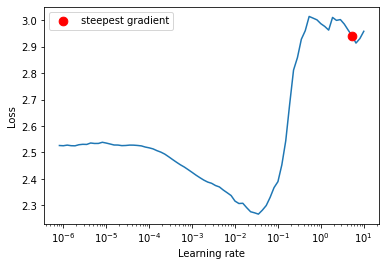

In [10]:

model = ResNet18().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7,momentum=0.9, weight_decay=lambda_l2)

findLR(model,criterion, optimizer,train_loader)


### Model Trainer

In [11]:
model = ResNet18().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)
scheduler = ReduceLROnPlateau(optimizer, 'min')

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(sum(train_loss)/len(train_loss))
    train_accuracy.append(sum(train_acc)/len(train_acc))

    
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

    scheduler.step(test_loss)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 1.182525	 Accuracy:45.908: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009814, Accuracy: 5725/10000 (57.250%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.845893	 Accuracy:65.436: 100%|██████████| 391/391 [00:40<00:00,  9.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006583, Accuracy: 7143/10000 (71.430%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.654213	 Accuracy:73.026: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006566, Accuracy: 7216/10000 (72.160%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.544038	 Accuracy:77.634: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005187, Accuracy: 7756/10000 (77.560%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.643357	 Accuracy:80.228: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005295, Accuracy: 7901/10000 (79.010%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.753427	 Accuracy:82.360: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004326, Accuracy: 8165/10000 (81.650%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.386043	 Accuracy:84.422: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003752, Accuracy: 8428/10000 (84.280%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.349835	 Accuracy:85.826: 100%|██████████| 391/391 [00:40<00:00,  9.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003726, Accuracy: 8453/10000 (84.530%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.477856	 Accuracy:87.274: 100%|██████████| 391/391 [00:40<00:00,  9.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003792, Accuracy: 8410/10000 (84.100%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.351056	 Accuracy:88.470: 100%|██████████| 391/391 [00:40<00:00,  9.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003552, Accuracy: 8558/10000 (85.580%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.168796	 Accuracy:89.358: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003471, Accuracy: 8601/10000 (86.010%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.432593	 Accuracy:90.370: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003504, Accuracy: 8599/10000 (85.990%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.368419	 Accuracy:90.838: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003985, Accuracy: 8464/10000 (84.640%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.239055	 Accuracy:91.682: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003595, Accuracy: 8672/10000 (86.720%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.150118	 Accuracy:92.500: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003385, Accuracy: 8701/10000 (87.010%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.295428	 Accuracy:93.066: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003404, Accuracy: 8744/10000 (87.440%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.097444	 Accuracy:93.642: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003278, Accuracy: 8753/10000 (87.530%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.227909	 Accuracy:93.980: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003673, Accuracy: 8760/10000 (87.600%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.119429	 Accuracy:94.434: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003809, Accuracy: 8768/10000 (87.680%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.166166	 Accuracy:94.750: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004177, Accuracy: 8653/10000 (86.530%)

EPOCH: 20


Train: Batch id: 390 	Loss: 0.140412	 Accuracy:95.120: 100%|██████████| 391/391 [00:40<00:00,  9.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003767, Accuracy: 8806/10000 (88.060%)

EPOCH: 21


Train: Batch id: 390 	Loss: 0.129842	 Accuracy:95.392: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003903, Accuracy: 8755/10000 (87.550%)

EPOCH: 22


Train: Batch id: 390 	Loss: 0.172078	 Accuracy:95.560: 100%|██████████| 391/391 [00:40<00:00,  9.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004118, Accuracy: 8730/10000 (87.300%)

EPOCH: 23


Train: Batch id: 390 	Loss: 0.074309	 Accuracy:95.944: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003800, Accuracy: 8828/10000 (88.280%)

EPOCH: 24


Train: Batch id: 390 	Loss: 0.059581	 Accuracy:96.122: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003951, Accuracy: 8805/10000 (88.050%)

EPOCH: 25


Train: Batch id: 390 	Loss: 0.017151	 Accuracy:96.276: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004054, Accuracy: 8751/10000 (87.510%)

EPOCH: 26


Train: Batch id: 390 	Loss: 0.192612	 Accuracy:96.564: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003742, Accuracy: 8862/10000 (88.620%)

EPOCH: 27


Train: Batch id: 390 	Loss: 0.164400	 Accuracy:96.576: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003730, Accuracy: 8884/10000 (88.840%)

EPOCH: 28


Train: Batch id: 390 	Loss: 0.054687	 Accuracy:97.766: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003188, Accuracy: 9007/10000 (90.070%)

EPOCH: 29


Train: Batch id: 390 	Loss: 0.040354	 Accuracy:98.192: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003122, Accuracy: 9027/10000 (90.270%)

EPOCH: 30


Train: Batch id: 390 	Loss: 0.125792	 Accuracy:98.318: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003096, Accuracy: 9045/10000 (90.450%)

EPOCH: 31


Train: Batch id: 390 	Loss: 0.038984	 Accuracy:98.462: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003185, Accuracy: 9066/10000 (90.660%)

EPOCH: 32


Train: Batch id: 390 	Loss: 0.007967	 Accuracy:98.570: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003211, Accuracy: 9047/10000 (90.470%)

EPOCH: 33


Train: Batch id: 390 	Loss: 0.111226	 Accuracy:98.614: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003206, Accuracy: 9052/10000 (90.520%)

EPOCH: 34


Train: Batch id: 390 	Loss: 0.075043	 Accuracy:98.510: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003222, Accuracy: 9065/10000 (90.650%)

EPOCH: 35


Train: Batch id: 390 	Loss: 0.055053	 Accuracy:98.688: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003188, Accuracy: 9058/10000 (90.580%)

EPOCH: 36


Train: Batch id: 390 	Loss: 0.004739	 Accuracy:98.724: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003262, Accuracy: 9060/10000 (90.600%)

EPOCH: 37


Train: Batch id: 390 	Loss: 0.038493	 Accuracy:98.800: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003284, Accuracy: 9065/10000 (90.650%)

EPOCH: 38


Train: Batch id: 390 	Loss: 0.024018	 Accuracy:98.738: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003246, Accuracy: 9054/10000 (90.540%)

EPOCH: 39


Train: Batch id: 390 	Loss: 0.049727	 Accuracy:98.768: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003261, Accuracy: 9077/10000 (90.770%)

EPOCH: 40


Train: Batch id: 390 	Loss: 0.036942	 Accuracy:98.828: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003274, Accuracy: 9065/10000 (90.650%)

EPOCH: 41


Train: Batch id: 390 	Loss: 0.016445	 Accuracy:98.862: 100%|██████████| 391/391 [00:40<00:00,  9.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003297, Accuracy: 9054/10000 (90.540%)

EPOCH: 42


Train: Batch id: 390 	Loss: 0.025832	 Accuracy:98.842: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003287, Accuracy: 9067/10000 (90.670%)

EPOCH: 43


Train: Batch id: 390 	Loss: 0.007437	 Accuracy:98.868: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003251, Accuracy: 9068/10000 (90.680%)

EPOCH: 44


Train: Batch id: 390 	Loss: 0.016855	 Accuracy:98.930: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003238, Accuracy: 9072/10000 (90.720%)

EPOCH: 45


Train: Batch id: 390 	Loss: 0.031088	 Accuracy:98.866: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003263, Accuracy: 9091/10000 (90.910%)

EPOCH: 46


Train: Batch id: 390 	Loss: 0.023248	 Accuracy:98.932: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003233, Accuracy: 9074/10000 (90.740%)

EPOCH: 47


Train: Batch id: 390 	Loss: 0.049904	 Accuracy:98.936: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003336, Accuracy: 9069/10000 (90.690%)

EPOCH: 48


Train: Batch id: 390 	Loss: 0.018134	 Accuracy:98.970: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003279, Accuracy: 9081/10000 (90.810%)

EPOCH: 49


Train: Batch id: 390 	Loss: 0.028153	 Accuracy:98.972: 100%|██████████| 391/391 [00:40<00:00,  9.63it/s]



Test set: loss: 0.003227, Accuracy: 9084/10000 (90.840%)



### Model performance

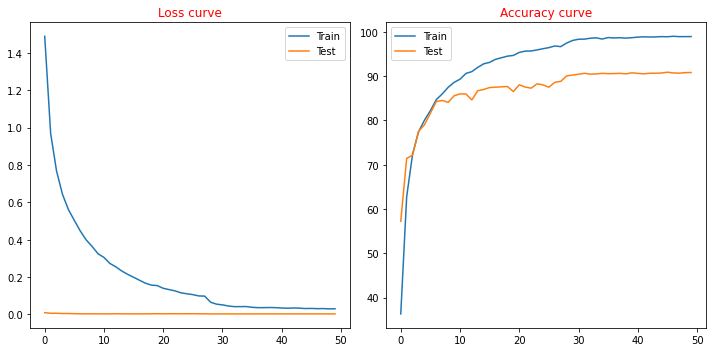

In [12]:
plot_performace(train_accuracy,test_accuracy,train_losses,test_losses,True,dir)

### Grad Cam

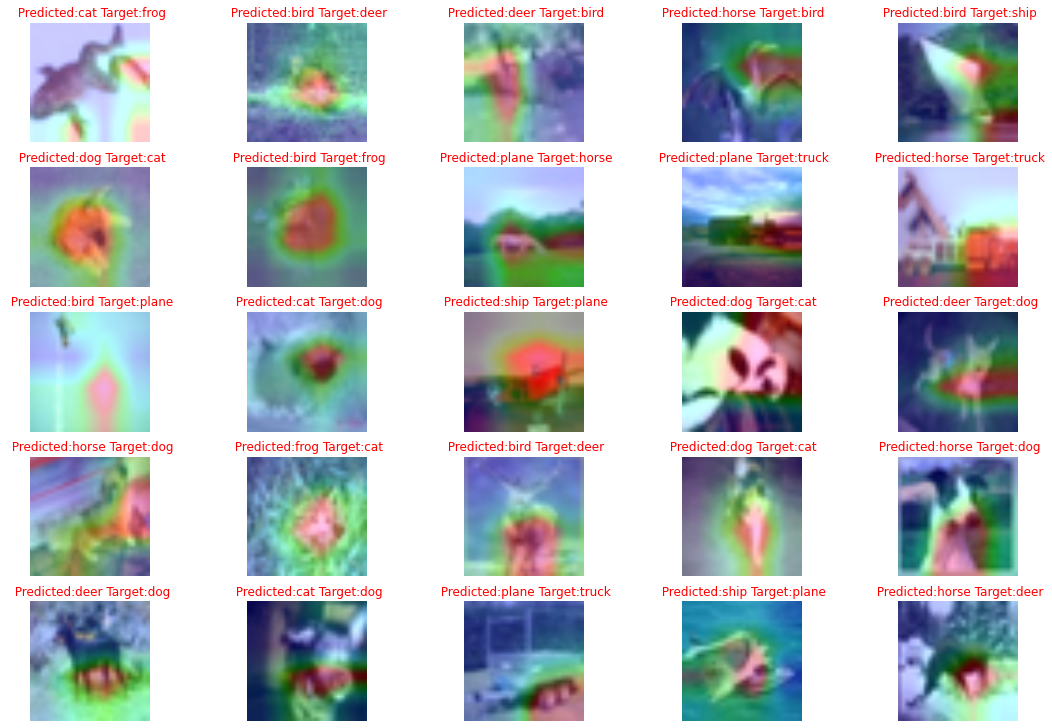

In [13]:
plot_grad_cam(model,classes,test_loader,device,25,False,dir)

### Misclassification

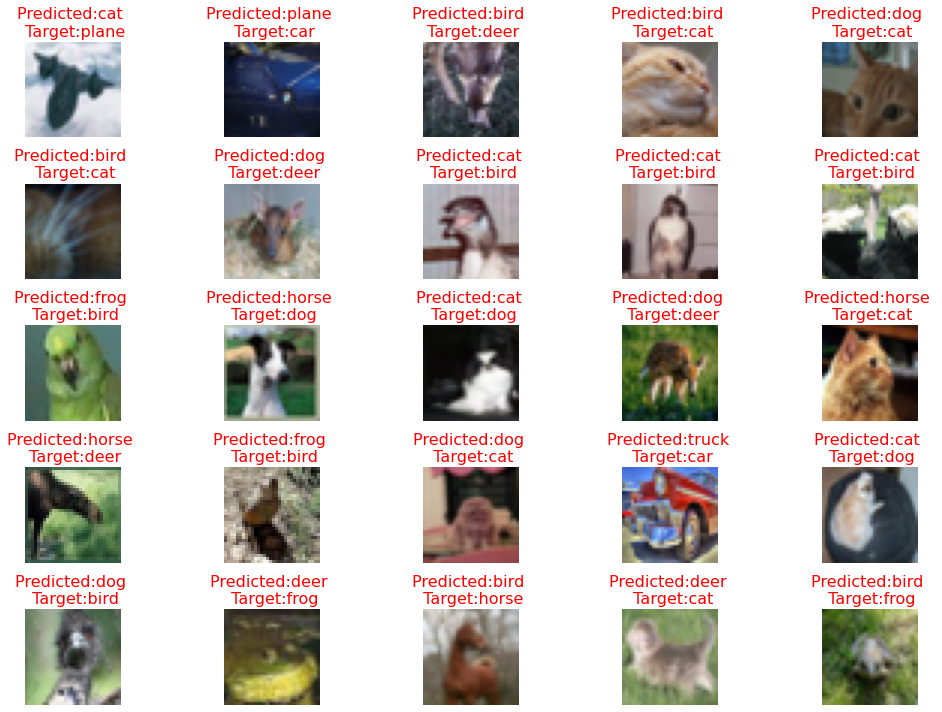

In [15]:
incorrect_Classification(model,classes,test_loader,device,True,dir)

### Class wise accuracy

In [16]:
class_accuracy(classes,model,test_loader,device)

Accuracy of plane : 91 %
Accuracy of   car : 95 %
Accuracy of  bird : 96 %
Accuracy of   cat : 91 %
Accuracy of  deer : 92 %
Accuracy of   dog : 91 %
Accuracy of  frog : 86 %
Accuracy of horse : 97 %
Accuracy of  ship : 92 %
Accuracy of truck : 100 %
